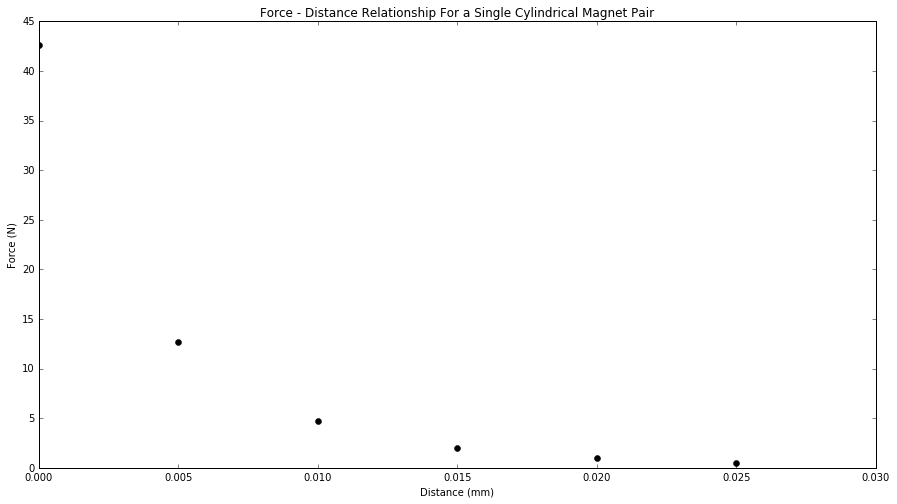

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
dist=[1e-5,5e-3,10e-3,15e-3,20e-3,25e-3]
force=[42.5798,12.6549,4.7088,2.03067,0.95157,0.4905]
sigma=[1e20,1e2,1e1,1e-1,1e-2,1e-3]


fig, axis = plt.subplots(figsize=(15,8))
axis.plot(dist, force, 'ko') #plotting raw data
axis.set_ylim(0,45)
plt.title('Force - Distance Relationship For a Single Cylindrical Magnet Pair')
plt.xlabel('Distance (mm)')
plt.ylabel('Force (N)')

plt.show()

In [12]:
def funcToFit(dist,M,c): #providing a model to compare to the data, to see if the model is a good approximation
    K = 9.87e-15
    h = 5e-3
    return K*M**2*(((1/(dist**2))+(1/(dist+2*h)**2)-(2/(dist+h)**2)))+c #returning equation for force

In [48]:
from scipy.optimize import curve_fit
M0 = 1e5 #starting guess for magnetization
c0 = 0 #displacement constant incase the data is offset by a value in y (force)
p = [M0,c0] 
popt,pcov = curve_fit(funcToFit,dist[2:],force[2:],p0=p,sigma=sigma[2:])

In [49]:
M,c = popt #values of magnetization and the constant c as calculated by the model function
print M
print c

459339.094206
0.086346508817


In [50]:
#print pcov
print( np.diag(pcov) )

[  7.04697394e+07   2.26428245e-04]


In [51]:
Fmodel = []
distBins = np.arange(1e-3,26e-3,1e-4) #distances for the function to use to make the model
for i in range(len(distBins)):
    Fmodel.append(funcToFit(distBins[i],M,c)) #inputting the arguements into the function
                                                #for the model

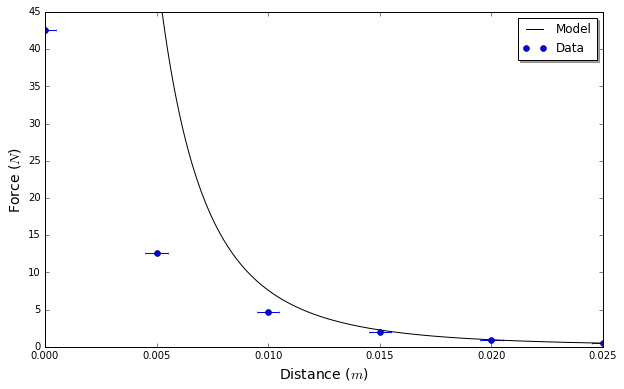

In [52]:
fig, axis = plt.subplots(figsize=(10,6))
e = [0.49,0.49,0.49,0.49,0.49]
axis.plot(distBins, Fmodel, 'k',label='Model') #model
axis.plot(dist, force, 'bo', label='Data') #data
plt.errorbar(dist, force, xerr=0.0005, yerr=0.49e-4,fmt='.',capsize=1,ecolor='blue')
plt.errorbar?
axis.set_ylim(0,45)
axis.set_xlim(0,0.025)
#plt.title('Force - Distance Relationship For a Single Cylindrical Magnet Pair', fontsize=15)


plt.xlabel('Distance ($m$)', fontsize = 14)
plt.ylabel('Force ($N$)', fontsize=14)
axis.legend(shadow=True)
plt.show()


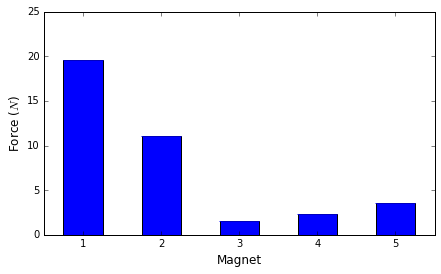

In [53]:
fig, axes = plt.subplots(figsize=(7,4))
Forces = [19.6, 11.1, 1.57, 2.37, 3.52]
magnets=[1,2,3,4,5]
axes.bar(magnets,Forces,width=0.5,yerr=0.49e-4,capsize=20, align='center')

axes.set_ylim(0,25)
axes.set_xlim(0.5,5.5)
axes.set_ylabel('Force ($N$)',fontsize=12)
axes.set_xlabel('Magnet',fontsize=12)
plt.show()